# Deep Deterministic Policy Gradients (DDPG)
---
In this notebook, we train DDPG with OpenAI Gym's Pendulum-v0 environment.

### 1. Import the Necessary Packages

In [1]:
import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import runner


from unityagents import UnityEnvironment

import pdb

### 2. Instantiate the Environment and Agent

In [2]:
path = 'C:\\Users\\mbgpcsk4\\Dropbox (The University of Manchester)\\D2019\\University\\Udacity\\P2_Reacher_Submission\\MultiAgent\\Reacher_Windows_x86_64\\Reacher.exe'

env = UnityEnvironment(file_name=path, no_graphics = True)


# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


### 3. Train the Agent with DDPG

Episode 1	Average Score: 0.49
Episode 2	Average Score: 0.25
Episode 3	Average Score: 0.17
Episode 4	Average Score: 0.13
Episode 5	Average Score: 0.11
Episode 6	Average Score: 0.09
Episode 7	Average Score: 0.09
Episode 8	Average Score: 0.08
Episode 9	Average Score: 0.09
Episode 10	Average Score: 0.18
Episode 11	Average Score: 0.24
Episode 12	Average Score: 0.30
Episode 13	Average Score: 0.33
Episode 14	Average Score: 0.37
Episode 15	Average Score: 0.40
Episode 16	Average Score: 0.42
Episode 17	Average Score: 0.44
Episode 18	Average Score: 0.45
Episode 19	Average Score: 0.45
Episode 20	Average Score: 0.46
Episode 21	Average Score: 0.44
Episode 22	Average Score: 0.44
Episode 23	Average Score: 0.43
Episode 24	Average Score: 0.42
Episode 25	Average Score: 0.40
Episode 26	Average Score: 0.39
Episode 27	Average Score: 0.38
Episode 28	Average Score: 0.37
Episode 29	Average Score: 0.36
Episode 30	Average Score: 0.35
Episode 31	Average Score: 0.34
Episode 32	Average Score: 0.33
Episode 33	Averag

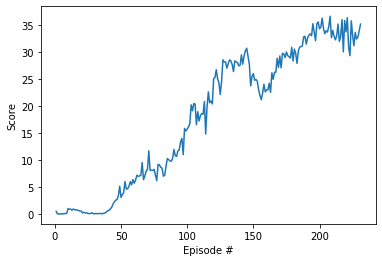

In [3]:
importlib.reload(runner)
arguments = {
    'episodes': 2000,                           # number of episodes
    'maxlen': 100,                              # sliding window size of recent scores
    'brain_name': brain_name,                   # the brain name of the unity environment
    'achievement': 30.,                         # score at which the environment is considered beaten
    'achievement_length': 100,                  # how long the agent needs to get a score above the achievement to solve the environment
    'environment': env, 
    'agent_args': {
        'state_size': 33,
        'action_size': 4,
        'random_seed': 2,
        'fc1_units': 400,
        'fc2_units': 300,
        'update_type': 'soft',
        'tau': 1e-3,
        'gamma': 0.9,
        'buffer_size': int(2e6),
        'batch_size': 1024,
        'batches_per_update': 10,
        'lr_actor': 1e-3,
        'lr_critic': 1e-3,
        'weight_decay': 0
        
        }
    }

scores = runner.ddpg(arguments)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In [7]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

state = env.reset()
for t in range(200):
    action = agent.act(state, add_noise=False)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 



KeyError: 'ReacherBrain'

### 6. Explore

In this exercise, we have provided a sample DDPG agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster than this benchmark implementation.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task!
- Write your own DDPG implementation.  Use this code as reference only when needed -- try as much as you can to write your own algorithm from scratch.
- You may also like to implement prioritized experience replay, to see if it speeds learning.  
- The current implementation adds Ornsetein-Uhlenbeck noise to the action space.  However, it has [been shown](https://blog.openai.com/better-exploration-with-parameter-noise/) that adding noise to the parameters of the neural network policy can improve performance.  Make this change to the code, to verify it for yourself!
- Write a blog post explaining the intuition behind the DDPG algorithm and demonstrating how to use it to solve an RL environment of your choosing.  